In [1]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 262.1 kB/s eta 0:00:04
   --------------- ------------------------ 0.5/1.4 MB 262.1 kB/s eta 0:00:04
   --------------- ------------------------ 0.5/1.4 MB 262.1 kB/s eta 0:00:04
   --------------- ------------------------ 0.5/1.4 MB 262.1 kB/s eta 0:00:04
   --------------- ------------------------ 0.5/1.4 MB 262.1 kB/s eta 0:00:04
   --------------- ------------------------ 0.5/1.4 MB 262.1 kB/s eta 0:00:04
   --------------- ------------------------ 0.5/1

In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Load dataset
df = pd.read_csv("D:/dm_assignment/datasets/apriori_dataset.csv")

In [2]:
# Convert items column into transactions (list of lists)
transactions = df['Items'].apply(lambda x: x.split(", ")).tolist()

# Transform into one-hot encoded dataframe
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori with min support = 0.57 (57%)
frequent_itemsets = apriori(df_trans, min_support=0.57, use_colnames=True)

# Generate association rules with min confidence = 0.83 (83%)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.83)

In [3]:
# Show results
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Frequent Itemsets:
    support        itemsets
0  0.666667         (bread)
1  0.666667          (cola)
2  0.666667        (diaper)
3  0.666667         (juice)
4  0.833333          (milk)
5  0.666667    (cola, milk)
6  0.666667  (milk, diaper)

Association Rules:
  antecedents consequents   support  confidence  lift
0      (cola)      (milk)  0.666667         1.0   1.2
1    (diaper)      (milk)  0.666667         1.0   1.2


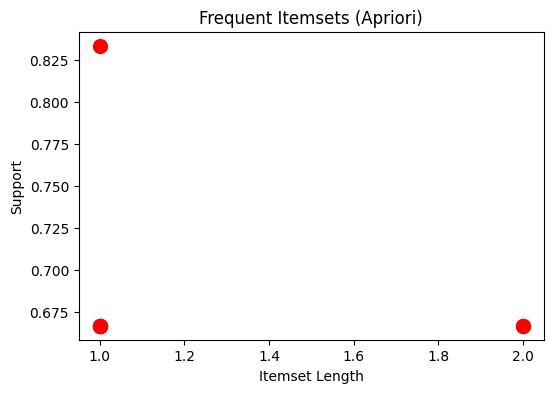

In [4]:
# Plot Frequent Itemsets (Support vs Itemset Length) 

import matplotlib.pyplot as plt

# Add length column (number of items in each set)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

plt.figure(figsize=(6,4))
plt.scatter(frequent_itemsets['length'], frequent_itemsets['support'], s=100, c="red")
plt.xlabel("Itemset Length")
plt.ylabel("Support")
plt.title("Frequent Itemsets (Apriori)")
plt.show()

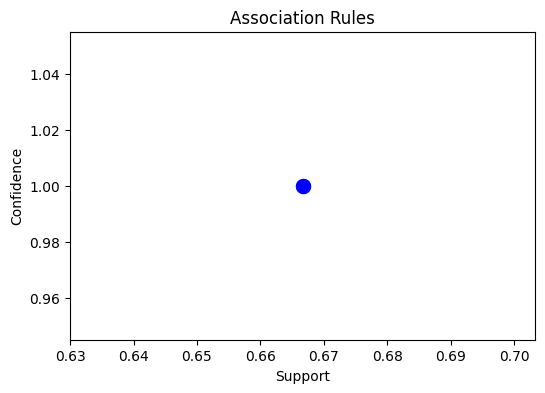

In [6]:
# Plot Association Rules (Support vs Confidence)
plt.figure(figsize=(6,4))
plt.scatter(rules['support'], rules['confidence'], s=100, c="blue")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Association Rules")
plt.show()

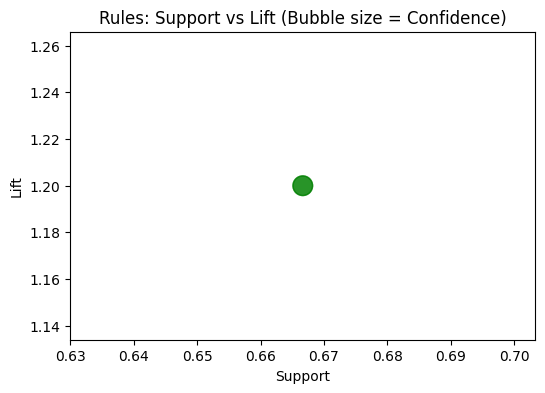

In [7]:
# Support vs Lift (Bubble Plot)

plt.figure(figsize=(6,4))
plt.scatter(rules['support'], rules['lift'], s=rules['confidence']*200, alpha=0.6, c="green")
plt.xlabel("Support")
plt.ylabel("Lift")
plt.title("Rules: Support vs Lift (Bubble size = Confidence)")
plt.show()